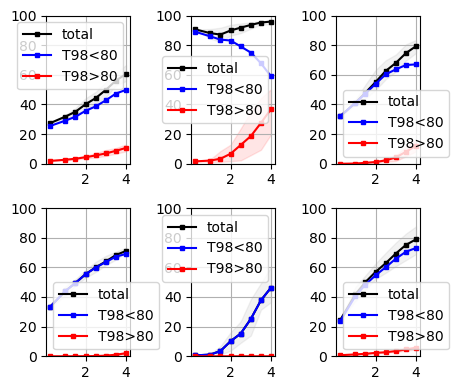

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
models = ['ACCESS-CM2', 'BCC-CSM2-MR', 'CanESM5', 'CNRM-CM6-1', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'EC-Earth3_r1i1p1f1',
          'EC-Earth3_r3i1p1f1', 'EC-Earth3_r4i1p1f1',
          'GFDL-ESM4', 'HadGEM3-GC31-LL', 'KACE-1-0-G', 'MIROC6', 'MIROC-ES2L', 'MPI-ESM1-2-HR_r1i1p1f1',
          'MPI-ESM1-2-HR_r2i1p1f1',
          'MPI-ESM1-2-LR', 'HadGEM3-GC31-MM', 'KIOST-ESM', 'MRI-ESM2-0']

model_indices = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
country_list = ["whole world","SAian",'MED',"SAmeri" ,'SEA','NAmeri']

targets = [0.25, 0.8, 1, 1.5, 2,2.5,3,3.5,4]

n_countries = len(country_list)
n_cols = 3  
n_rows = int(np.ceil(n_countries / n_cols))

plt.figure(figsize=(n_cols * 1.5, n_rows * 2))  #
up_q=90
bot_q=10
for i, country_name in enumerate(country_list, start=1):
    ration_all_models = []

    
    for model_index in model_indices:
        model = models[model_index]
        try:
           with open(f'/nfs/turbo/seas-mtcraig-climate/Haochi/PVTemp_Bias_Corr/0508_update_figure/09_exposure_data/{country_name}_{model}_70_data.pkl', 'rb') as handle:
                data_loaded = pickle.load(handle)
                ration = [value for _, value in data_loaded.items() if _.startswith(f"{country_name},")]
                ration_all_models.append(ration)
        except FileNotFoundError:
            print(f"Data file for {model} not found.")

    ration_all_models = np.array(ration_all_models)
    if ration_all_models.size == 0:
        raise ValueError("No data loaded.")

  
    mean_ration = np.mean(ration_all_models, axis=0)
    percentile_75 = np.percentile(ration_all_models, up_q, axis=0)
    percentile_25 = np.percentile(ration_all_models, bot_q, axis=0)

    plt.subplot(n_rows, n_cols, i)
    plt.plot(targets, mean_ration, marker='s', markersize=3, label=f'total', color='black')
    plt.fill_between(targets, percentile_25, percentile_75, color='grey', alpha=0.1)

    ration_all_models = []
    for model_index in model_indices:
        model = models[model_index]
        try:
            with open(f'/nfs/turbo/seas-mtcraig-climate/Haochi/PVTemp_Bias_Corr/0508_update_figure/09_exposure_data/{country_name}_{model}_80_data.pkl', 'rb') as handle:
                data_loaded = pickle.load(handle)
                ration = [value for _, value in data_loaded.items() if _.startswith(f"{country_name},")]
                ration_all_models.append(ration)
        except FileNotFoundError:
            print(f"Data file for {model} not found.")
            
    ration_all_models = np.array(ration_all_models)
    if ration_all_models.size == 0:
        raise ValueError("No data loaded.")
    
    mean_ration2 = np.mean(ration_all_models, axis=0)
    percentile_75 = np.percentile(ration_all_models, up_q, axis=0)
    percentile_25 = np.percentile(ration_all_models, bot_q, axis=0)
    
    plt.plot(targets, mean_ration - mean_ration2, marker='s', markersize=3, label='T98<80', color='blue')
    plt.plot(targets, mean_ration2, marker='s', markersize=3, label='T98>80',color='red')
    plt.fill_between(targets, percentile_25, percentile_75, color='red', alpha=0.1)

    # plt.xlabel('Global Warming Target (°C)')
    # plt.ylabel('RPV Capacity %')
    plt.ylim(0, 100)
    # plt.title(f"{country_name} RPV Risk")
    plt.grid(True)
    plt.legend()

plt.tight_layout()  
plt.show()


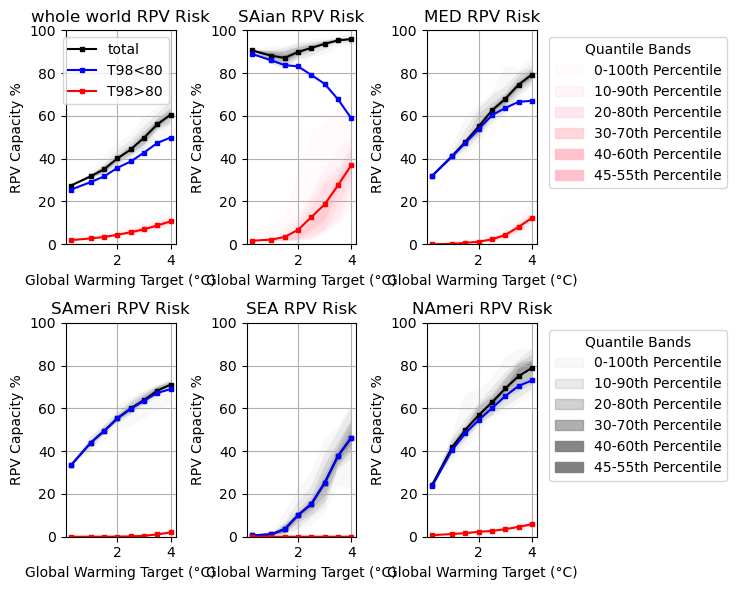

In [2]:


import matplotlib.patches as mpatches
import pickle
import numpy as np
import matplotlib.pyplot as plt
models = ['ACCESS-CM2', 'BCC-CSM2-MR', 'CanESM5', 'CNRM-CM6-1', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'EC-Earth3_r1i1p1f1',
          'EC-Earth3_r3i1p1f1', 'EC-Earth3_r4i1p1f1',
          'GFDL-ESM4', 'HadGEM3-GC31-LL', 'KACE-1-0-G', 'MIROC6', 'MIROC-ES2L', 'MPI-ESM1-2-HR_r1i1p1f1',
          'MPI-ESM1-2-HR_r2i1p1f1',
          'MPI-ESM1-2-LR', 'HadGEM3-GC31-MM', 'KIOST-ESM', 'MRI-ESM2-0']

model_indices = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
country_list = ["whole world","SAian",'MED',"SAmeri" ,'SEA','NAmeri']
quantile_pairs = [(0, 100), (10, 90), (20, 80), (30, 70), (40, 60), (45, 55)]

targets = [0.25, 0.8, 1, 1.5, 2,2.5,3,3.5,4]

n_countries = len(country_list)
n_cols = 3  # 
n_rows = int(np.ceil(n_countries / n_cols))

plt.figure(figsize=(n_cols * 2.5, n_rows * 3)) 
up_q=90
bot_q=10
for i, country_name in enumerate(country_list, start=1):
    ration_all_models = []

    for model_index in model_indices:
        model = models[model_index]
        try:
           with open(f'/nfs/turbo/seas-mtcraig-climate/Haochi/PVTemp_Bias_Corr/0508_update_figure/09_exposure_data/{country_name}_{model}_70_data.pkl', 'rb') as handle:
                data_loaded = pickle.load(handle)
                ration = [value for _, value in data_loaded.items() if _.startswith(f"{country_name},")]
                ration_all_models.append(ration)
        except FileNotFoundError:
            print(f"Data file for {model} not found.")

    ration_all_models = np.array(ration_all_models)
    if ration_all_models.size == 0:
        raise ValueError("No data loaded.")

    mean_ration = np.mean(ration_all_models, axis=0)
    percentile_75 = np.percentile(ration_all_models, up_q, axis=0)
    percentile_25 = np.percentile(ration_all_models, bot_q, axis=0)

    plt.subplot(n_rows, n_cols, i)
    plt.plot(targets, mean_ration, marker='s', markersize=3, label=f'total', color='black')
    
    alphas = np.linspace(0.05, 0.4, num=len(quantile_pairs))  # Gradually increasing alpha for visibility
    for j, (lower, upper) in enumerate(quantile_pairs):
        percentile_lower = np.percentile(ration_all_models, lower, axis=0)
        percentile_upper = np.percentile(ration_all_models, upper, axis=0)
        plt.fill_between(targets, percentile_lower, percentile_upper, color='grey', alpha=alphas[j],edgecolor='none')

    ration_all_models = []
    for model_index in model_indices:
        model = models[model_index]
        try:
            with open(f'/nfs/turbo/seas-mtcraig-climate/Haochi/PVTemp_Bias_Corr/0508_update_figure/09_exposure_data/{country_name}_{model}_80_data.pkl', 'rb') as handle:
                data_loaded = pickle.load(handle)
                ration = [value for _, value in data_loaded.items() if _.startswith(f"{country_name},")]
                ration_all_models.append(ration)
        except FileNotFoundError:
            print(f"Data file for {model} not found.")
            
    ration_all_models = np.array(ration_all_models)
    if ration_all_models.size == 0:
        raise ValueError("No data loaded.")
    
    mean_ration2 = np.mean(ration_all_models, axis=0)
    percentile_75 = np.percentile(ration_all_models, up_q, axis=0)
    percentile_25 = np.percentile(ration_all_models, bot_q, axis=0)
    
    plt.plot(targets, mean_ration - mean_ration2, marker='s', markersize=3, label='T98<80', color='blue')
    plt.plot(targets, mean_ration2, marker='s', markersize=3, label='T98>80',color='red')
    alphas = np.linspace(0.05, 0.4, num=len(quantile_pairs))  # Gradually increasing alpha for visibility
    for j, (lower, upper) in enumerate(quantile_pairs):
        percentile_lower = np.percentile(ration_all_models, lower, axis=0)
        percentile_upper = np.percentile(ration_all_models, upper, axis=0)
        plt.fill_between(targets, percentile_lower, percentile_upper, color='pink', alpha=alphas[j],edgecolor='none')

    plt.xlabel('Global Warming Target (°C)')
    plt.ylabel('RPV Capacity %')
    plt.ylim(0, 100)
    plt.title(f"{country_name} RPV Risk")
    plt.grid(True)
    # Create custom legends for quantile bands

    if i==1:
        plt.legend()
    if i==3:
        alphas_cumulative = np.cumsum(alphas)
        
        alphas_cumulative = np.clip(alphas_cumulative, 0, 1)
        
        legend_patches = [mpatches.Patch(color='pink', alpha=alpha, label=f'{lower}-{upper}th Percentile') for (lower, upper), alpha in zip(quantile_pairs, alphas_cumulative)]
        plt.legend(handles=legend_patches, title="Quantile Bands", bbox_to_anchor=(1.05, 1))
    if i==6:
        alphas_cumulative = np.cumsum(alphas)
        
        alphas_cumulative = np.clip(alphas_cumulative, 0, 1)
        
        legend_patches = [mpatches.Patch(color='grey', alpha=alpha, label=f'{lower}-{upper}th Percentile') for (lower, upper), alpha in zip(quantile_pairs, alphas_cumulative)]
        plt.legend(handles=legend_patches, title="Quantile Bands", bbox_to_anchor=(1.05, 1))

plt.tight_layout()  #
plt.show()


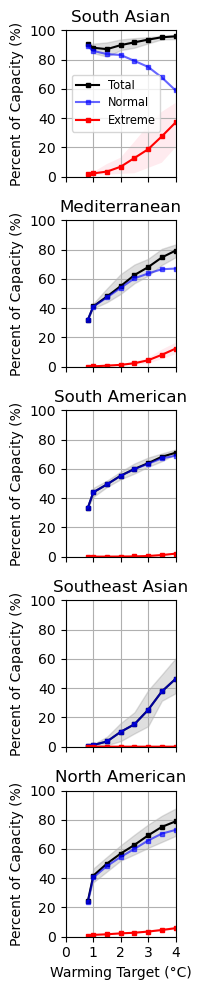

In [18]:
import matplotlib.patches as mpatches
import pickle
import numpy as np
import matplotlib.pyplot as plt
# Targets for warming levels
targets = [0.25, 0.8, 1, 1.5, 2, 2.5, 3, 3.5, 4]

########################
quantile_pairs = [(10, 90)]
########################

# Plot layout
n_countries = len(country_list)
n_cols = 1
n_rows = int(np.ceil(n_countries / n_cols))

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2), sharex=True)  # Share x-axis

up_q = 90
bot_q = 10
for i, ax in enumerate(axs.flatten()):
    if i >= len(country_list):  # If there are more subplots than countries
        ax.axis('off')  # Turn off axis for empty subplots
        continue
    
    country_name = country_list[i]
    ration_all_models = []

    # Load model data for T98<70 scenario
    for model_index in model_indices:
        model = models[model_index]
        filepath = f'/nfs/turbo/seas-mtcraig-climate/Haochi/PVTemp_Bias_Corr/0508_update_figure/09_exposure_data/{country_name}_{model}_70_data.pkl'
        try:
            with open(filepath, 'rb') as handle:
                data_loaded = pickle.load(handle)
                ration = [value for _, value in data_loaded.items() if _.startswith(f"{country_name},")]
                ration_all_models.append(ration)
        except FileNotFoundError:
            print(f"Data file for {model} not found.")

    ration_all_models = np.array(ration_all_models)
    if not ration_all_models.size:
        continue

    # Calculate statistics
    mean_ration = np.mean(ration_all_models, axis=0)
    targets[0]=0.8
    # Plot
    ax.plot(targets, mean_ration, marker='s', markersize=3, label=f'Total', color='black')
    alphas = np.linspace(0.25, 0.4, num=len(quantile_pairs))  # Alpha values for quantiles
    for j, (lower, upper) in enumerate(quantile_pairs):
        percentile_lower = np.percentile(ration_all_models, lower, axis=0)
        percentile_upper = np.percentile(ration_all_models, upper, axis=0)
        ax.fill_between(targets, percentile_lower, percentile_upper, color='grey', alpha=alphas[j])

    # Repeat the process for T98>80 scenario
    ration_all_models = []
    for model_index in model_indices:
        model = models[model_index]
        filepath = f'/nfs/turbo/seas-mtcraig-climate/Haochi/PVTemp_Bias_Corr/0508_update_figure/09_exposure_data/{country_name}_{model}_80_data.pkl'
        try:
            with open(filepath, 'rb') as handle:
                data_loaded = pickle.load(handle)
                ration = [value for _, value in data_loaded.items() if _.startswith(f"{country_name},")]
                ration_all_models.append(ration)
        except FileNotFoundError:
            print(f"Data file for {model} not found.")

    ration_all_models = np.array(ration_all_models)
    if not ration_all_models.size:
        continue

    mean_ration2 = np.mean(ration_all_models, axis=0)
    color_rgb = (255/255, 204/255, 51/255)
    
    ax.plot(targets, mean_ration-mean_ration2, marker='s', markersize=3, label=f'Normal', color='blue',alpha=0.6)
    color_red = (160/255, 10/255, 120/255)
    ax.plot(targets, mean_ration2, marker='s', markersize=3, label=f'Extreme', color='red')
    alphas = np.linspace(0.3, 0.4, num=len(quantile_pairs))  # Gradually increasing alpha for visibility
    for j, (lower, upper) in enumerate(quantile_pairs):
        percentile_lower = np.percentile(ration_all_models, lower, axis=0)
        percentile_upper = np.percentile(ration_all_models, upper, axis=0)
        ax.fill_between(targets, percentile_lower, percentile_upper, color='pink', alpha=alphas[j],edgecolor='none')

    # ax.set_title(f"{country_name} RPV Risk")
    ax.set_ylim(0, 100)
    ax.set_xlim(1, 4)
    ax.grid(True)
    ax.set_xticks([0,1, 2, 3, 4])  # Specific grid lines
   

    # Only set x-labels on the bottom row
    if i >= (n_rows - 1) * n_cols:
        ax.set_xlabel('Warming Target (°C)')
    

    if i == 0:
        ax.legend(loc='center left',fontsize = 8.2)
    
    country_dict = {
    "SAian": "South Asian",
    "MED": "Mediterranean",
    "SAmeri": "South American",
    "SEA": "Southeast Asian",
    "NAmeri": "North American"
}


    ax.set_ylabel(f'Percent of Capacity (%)')
    ax.set_title(f'{country_dict[country_name]}')



plt.tight_layout()
plt.savefig('/nfs/turbo/seas-mtcraig-climate/Haochi/PVTemp_Bias_Corr/0508_update_figure/02_FIG3.pdf')
plt.show()
